Data source: http://www1.icsi.berkeley.edu/wcs/data.html
http://www1.icsi.berkeley.edu/wcs/data.html

Ideally, we want to load the file and automatically find the english chip location

There are 4 parts to this study:

    1. Libraries and variables initilization
    2. Manipulate data from WCS_data_core
    3. Manipulate data from bk_data
    4. Plot all data into the contour graph

Manipulate Data from WCS_data_core:

    2.1. Initialize a 2D array that can record the number of hits for each chip
    2.2. Extract fociData from WCS_data_core and increment the hit on each chip into the 2D array
    2.3. Format the 2D array data into the correct format

Manipulate Data from bk_data:

    3.1. Extract the BK dictionary in bK_data
    3.2. Filter the BK dict to just english, and convert list of dictionaries into a single dictionary object
    3.3. Extract the BK foci data in bK_data
    3.4. Filter the BK foci data to just english word
    3.5. Convert the BK foci data into 2D coordinate


In [1]:
# 1. Libraries and variables initilization
from wcs_helper_functions import *
import numpy as np
from scipy import stats
from random import random
%matplotlib inline

munsellInfo = readChipData('./WCS_data_core/chip.txt')
allChip = munsellInfo[0] # Character + Column Number => E29
indexCoord = munsellInfo[1] # Character, Column Number => {E, 29}
chartRowSize = findChipRowSize(allChip) # 10
chartColumnSize = findChipColumnSize(allChip) # 41
englishBKColorData = {}
englishTermNumber = 6 # Hard code it, because it says so in the txt file

print (munsellInfo[0]["E29"])
print (munsellInfo[1][1])

1
('E', '29')


In [2]:
# Manipulate data from WCS_data_core:
# 2.1. Initialize a 2D array that can record the number of hits for each chip
chipHitCountMap = initializeChipHitCountMap(indexCoord, chartColumnSize)
print(chipHitCountMap)

{'E': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'C': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'F': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'I': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'H': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'G': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'B': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'D': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [3]:
# Manipulate data from WCS_data_core:
# 2.2. Extract fociData from WCS_data_core and increment the hit on each chip into the 2D array
fociData = readFociData('./WCS_data_core/foci-exp.txt');
chipHitCountMap = countHitPerChip(fociData, chipHitCountMap)
for key in sorted(chipHitCountMap.keys()):
    print("%s: %s" % (key, chipHitCountMap[key]))

A: [2422, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
B: [109, 86, 81, 83, 85, 82, 81, 74, 73, 71, 117, 139, 132, 87, 61, 64, 63, 68, 71, 74, 79, 80, 77, 75, 73, 72, 66, 66, 71, 75, 71, 70, 72, 70, 74, 71, 70, 78, 80, 77, 87]
C: [66, 102, 100, 88, 81, 85, 67, 65, 492, 752, 351, 286, 181, 116, 57, 37, 29, 30, 32, 35, 35, 26, 27, 22, 24, 27, 34, 29, 27, 33, 28, 21, 27, 25, 24, 39, 36, 61, 74, 64, 80]
D: [77, 75, 74, 56, 51, 46, 174, 130, 153, 84, 66, 69, 52, 40, 36, 57, 71, 75, 58, 54, 52, 44, 34, 29, 36, 41, 40, 42, 60, 50, 33, 16, 18, 23, 15, 24, 29, 39, 54, 51, 71]
E: [139, 98, 69, 68, 131, 116, 37, 41, 37, 34, 31, 31, 28, 28, 26, 76, 155, 117, 110, 95, 81, 52, 49, 41, 48, 58, 69, 85, 118, 83, 44, 27, 27, 32, 28, 28, 28, 35, 66, 78, 81]
F: [160, 276, 240, 210, 216, 37, 33, 46, 44, 50, 32, 24, 27, 28, 25, 53, 157, 351, 156, 151, 102, 61, 47, 39, 40, 49, 65, 90, 174, 253, 88, 30, 42, 65, 44, 31, 36, 41, 59, 131,

In [4]:
# Manipulate data from WCS_data_core:
# 2.3. Format the 2D array data into the correct format
# Set first and last row as empty, because those chips are achromatic chips
hitList = dictToList(chipHitCountMap)   
hitList[0][0] = 0 
hitList[9][0] = 0
print (hitList)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [109, 86, 81, 83, 85, 82, 81, 74, 73, 71, 117, 139, 132, 87, 61, 64, 63, 68, 71, 74, 79, 80, 77, 75, 73, 72, 66, 66, 71, 75, 71, 70, 72, 70, 74, 71, 70, 78, 80, 77, 87], [66, 102, 100, 88, 81, 85, 67, 65, 492, 752, 351, 286, 181, 116, 57, 37, 29, 30, 32, 35, 35, 26, 27, 22, 24, 27, 34, 29, 27, 33, 28, 21, 27, 25, 24, 39, 36, 61, 74, 64, 80], [77, 75, 74, 56, 51, 46, 174, 130, 153, 84, 66, 69, 52, 40, 36, 57, 71, 75, 58, 54, 52, 44, 34, 29, 36, 41, 40, 42, 60, 50, 33, 16, 18, 23, 15, 24, 29, 39, 54, 51, 71], [139, 98, 69, 68, 131, 116, 37, 41, 37, 34, 31, 31, 28, 28, 26, 76, 155, 117, 110, 95, 81, 52, 49, 41, 48, 58, 69, 85, 118, 83, 44, 27, 27, 32, 28, 28, 28, 35, 66, 78, 81], [160, 276, 240, 210, 216, 37, 33, 46, 44, 50, 32, 24, 27, 28, 25, 53, 157, 351, 156, 151, 102, 61, 47, 39, 40, 49, 65, 90, 174, 253, 88, 30, 42, 65, 44, 31, 36, 41, 59, 131, 198], [144, 66

In [5]:
# Manipulate data from bk_data:
# 3.1. Extract the BK dictionary in bK_data
BKDictData =  readBKDictData('./bk_data/BK-dict.txt')
print (BKDictData[englishTermNumber])

{6: {'BU': 'blue'}, 4: {'GN': 'green'}, 8: {'PU': 'purple'}, 9: {'PI': 'pink'}, 10: {'OR': 'orange'}, 7: {'BR': 'brown'}, 3: {'RE': 'red'}, 11: {'GY': 'grey'}, 5: {'YE': 'yellow'}, 1: {'BA': 'black'}, 2: {'WH': 'white'}}


In [6]:
# Manipulate data from bk_data:
# 3.2. Filter the BK dict to just english, and convert list of dictionaries into a single dictionary object
BKEnglishDictData = BKDictData[englishTermNumber]
englishColorTermToName = convertListOfDictsToDict(BKEnglishDictData)
print (englishColorTermToName)

{'BU': 'blue', 'GN': 'green', 'PU': 'purple', 'PI': 'pink', 'OR': 'orange', 'BR': 'brown', 'RE': 'red', 'GY': 'grey', 'YE': 'yellow', 'BA': 'black', 'WH': 'white'}


In [7]:
# Manipulate data from bk_data:
# 3.3. Extract the BK foci data in bK_data
BKFociData = readBKFociData("./bk_data/BK-foci.txt", BKDictData)
print (BKFociData[englishTermNumber])

{1: {'BA': ['J:0'], 'WH': ['A:0', 'B:0'], 'RE': ['G:3', 'H:3'], 'GN': ['F:17', 'G:17'], 'YE': ['C:9'], 'BU': ['F:27', 'F:28', 'F:29', 'G:27', 'G:28', 'G:29'], 'BR': ['I:5', 'I:6', 'I:7'], 'PU': ['H:35', 'I:35'], 'PI': ['D:38', 'E:38'], 'OR': ['F:4'], 'GY': ['F:0']}}


In [8]:
# Manipulate data from bk_data:
# 3.4. Filter the BK foci data to just english word, as we just want the english chips
BKEnglishFociData = BKFociData[englishTermNumber]
BKEnglishFociData = list(BKEnglishFociData.values())
englishColorTermToCoord = BKEnglishFociData[0]
print (englishColorTermToCoord)

{'BA': ['J:0'], 'WH': ['A:0', 'B:0'], 'RE': ['G:3', 'H:3'], 'GN': ['F:17', 'G:17'], 'YE': ['C:9'], 'BU': ['F:27', 'F:28', 'F:29', 'G:27', 'G:28', 'G:29'], 'BR': ['I:5', 'I:6', 'I:7'], 'PU': ['H:35', 'I:35'], 'PI': ['D:38', 'E:38'], 'OR': ['F:4'], 'GY': ['F:0']}


In [9]:
# Manipulate data from bk_data:
# 3.5. Convert the BK foci data into 2D coordinate
for key, vals in englishColorTermToCoord.items():
    color = englishColorTermToName[key]  # englishColorTermToName["BA"] => black
    if (color not in englishBKColorData):
        englishBKColorData[color] = []
    for val in vals:
        coord = covertGridCoordTo2DListCoord(val) # val => "J:0" => covertGridCoordTo2DListCoord => [9,0
        englishBKColorData[color].append(coord)
        
print (englishBKColorData)

{'black': [[9, 0]], 'white': [[0, 0], [1, 0]], 'red': [[6, 3], [7, 3]], 'green': [[5, 17], [6, 17]], 'yellow': [[2, 9]], 'blue': [[5, 27], [5, 28], [5, 29], [6, 27], [6, 28], [6, 29]], 'brown': [[8, 5], [8, 6], [8, 7]], 'purple': [[7, 35], [8, 35]], 'pink': [[3, 38], [4, 38]], 'orange': [[5, 4]], 'grey': [[5, 0]]}


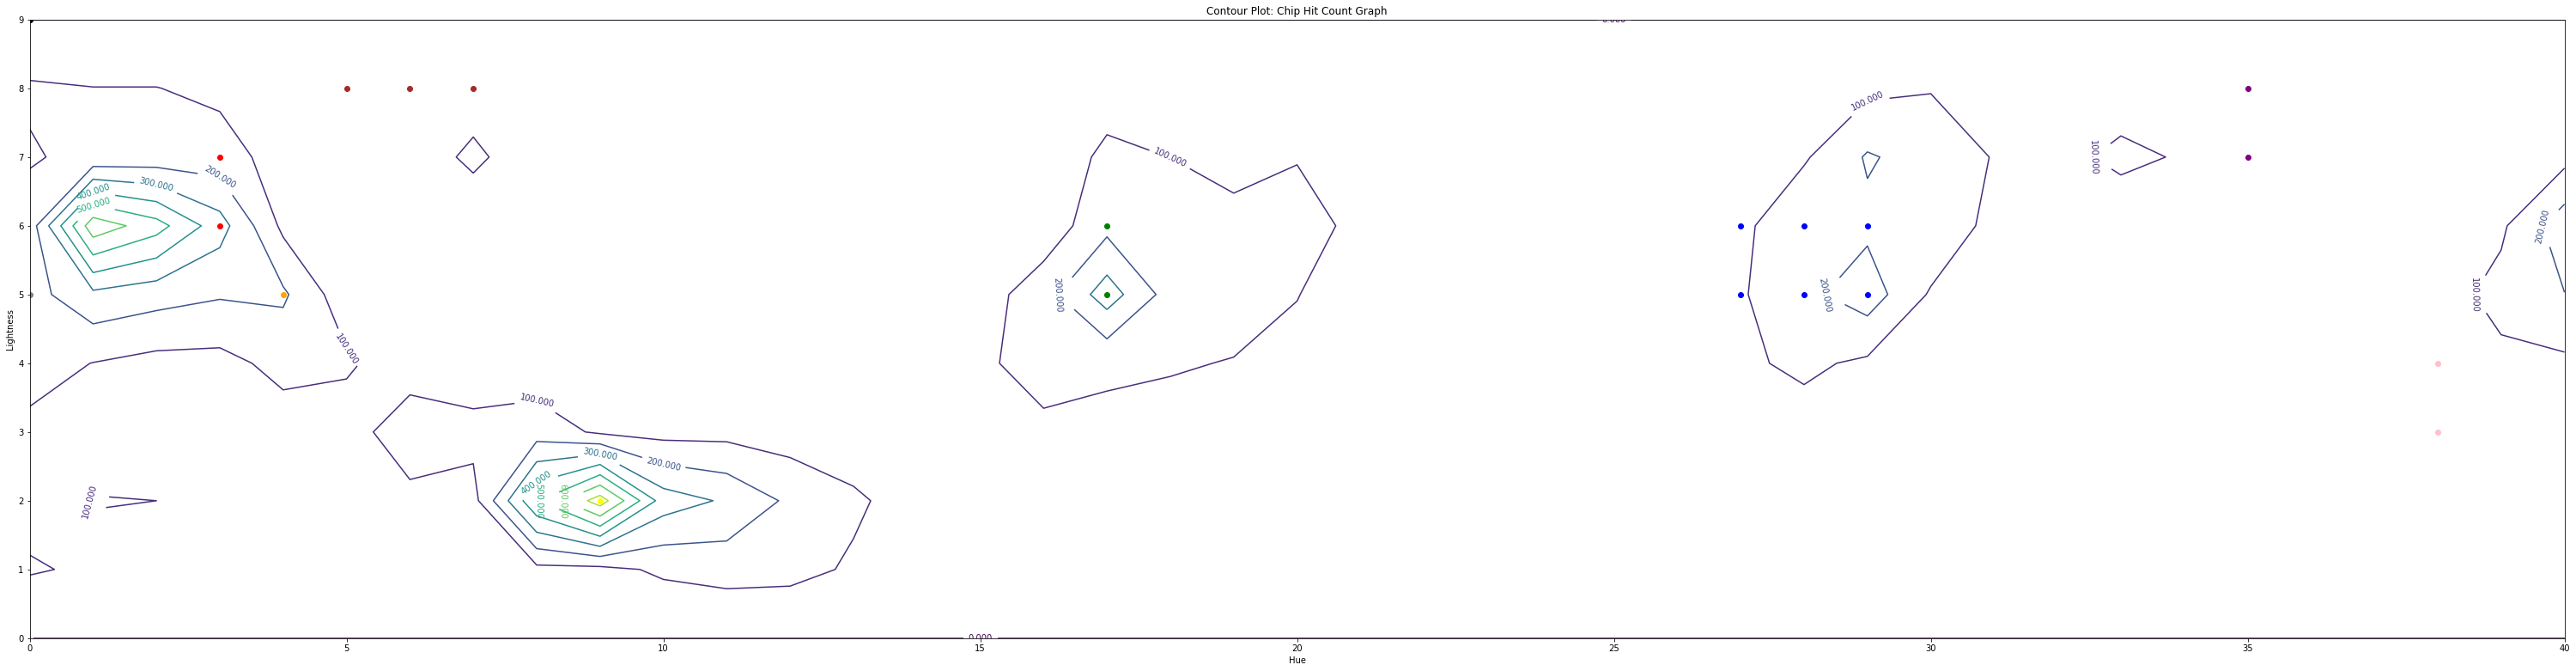

In [10]:
# Last Step
# 4. Plot all data into the contour graph
graph = createContourGraph(chartColumnSize, chartRowSize, hitList) # map the 2d mesh grid 2d 10*41
graph = addEnglishColorToGraph(graph, englishBKColorData) # plot the x and y values, 1d array
graph.show()